## Lead Conversion Group Case Study by: Sachin Katiyar and Ashwari Kadam

In [1]:
#Supressing warning, importing all the required libraries and setting max row and column limit for visual purpose
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [2]:
#Reading Leads.csv and storing it in df dataframe
df=pd.read_csv(r'C:\Users\kadam\Documents\Upgrad\Clustering\Case Study\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv')
df.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,Email Opened,India,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,Email Opened,India,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [3]:
#Size of df dataframe
df.shape

(9240, 37)

In [4]:
#Columns in dataframe
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [5]:
#Description of numerical columns
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
#Info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [7]:
#Changing Select value to NaN value and then finding percentage of null values in each column
df=df.replace("Select",np.NaN)
print((df.isnull().sum()/df.shape[0])*100)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [8]:
#Removing Columns having null value greater than 70% from dataframe (like: Lead Profile and How did you hear about X Education)
df = df.drop(df.loc[:,100*(df.isnull().sum()/df.shape[0])>70].columns, 1)

In [9]:
#Printing unique values in each column
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [10]:
#Dropping Prospect ID column as it is of no use
df=df.drop(['Prospect ID'], axis=1)
print(df.head())

   Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

  Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0          No          0          0.0                            0   
1          No          0          5.0                          674   
2          No          1          2.0                         1532   
3          No          0          1.0                          305   
4          No          1          2.0                         1428   

   Page Views Per Visit            Last Activity Country  \
0                   0.0  Page Visited on Website     NaN   
1                   2.5   

In [11]:
#Printing all unique value of each column
for col in df:
    print(col,end="-")
    print(df[col].unique())

Lead Number-[660737 660728 660727 ..., 579545 579538 579533]
Lead Origin-['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']
Lead Source-['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']
Do Not Email-['No' 'Yes']
Do Not Call-['No' 'Yes']
Converted-[0 1]
TotalVisits-[   0.    5.    2.    1.    4.    8.   11.    6.    3.    7.   13.   17.
   nan    9.   12.   10.   16.   14.   21.   15.   22.   19.   18.   20.
   43.   30.   23.   55.  141.   25.   27.   29.   24.   28.   26.   74.
   41.   54.  115.  251.   32.   42.]
Total Time Spent on Website-[   0  674 1532 ...,  603  483  927]
Page Views Per Visit-[  0.     2.5    2.     1.     4.     8.     2.67  11.     5.     6.     3.
   1.33   1.5    3.5    7.     2.33  13.     8

In [12]:
#Printing and Removing columns having only one unique value 
df_yn=pd.DataFrame(df.nunique())
print(df_yn[df_yn[0]==1].index)
df=df.drop(df_yn[df_yn[0]==1].index,axis=1)

Index(['Magazine', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque'],
      dtype='object')


In [13]:
#Printing size of updated dataframe
print(df.shape)

(9240, 29)


In [14]:
#Again checking for missing values in each column and trying to replace all missing values with desired value
(df.isnull().sum()/df.shape[0])*100

Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [15]:
#Dropping Asymmetrique Activity Score and Asymmetrique Profile Score as it has 45.64% null values and there is no way to fill the remaining null vaues
df = df.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   5860 non-null object
What is your current occupation                  6550 

### Univariate Analysis on Categorical Columns

In [16]:
#Finding out categorical variables for imputing null values by checking column type as object
obj_col=df.loc[:, df.dtypes == np.object].columns
print(obj_col)

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Quality', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')


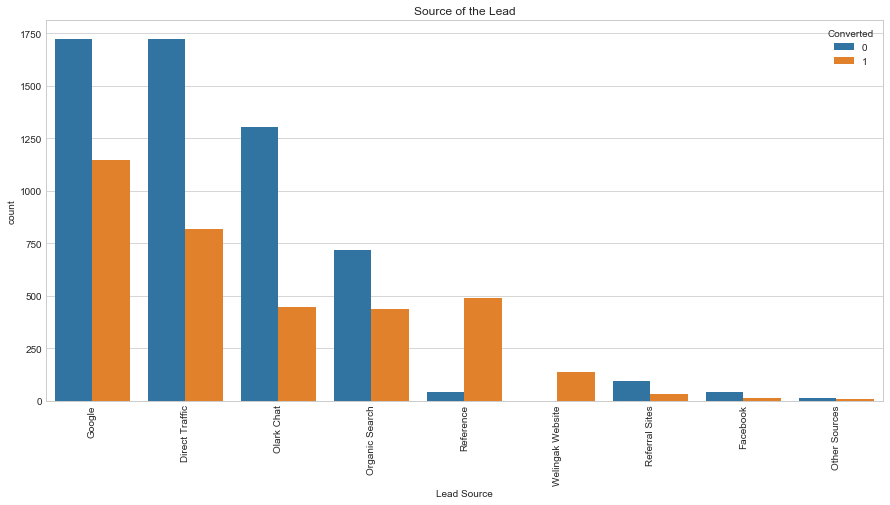

In [17]:
#Replacing google to Google as both are same and then drawing countplot on Lead Source taking hue as Converted
df["Lead Source"]=df["Lead Source"].replace(["bing","Click2call","Press_Release","Live Chat","Social Media","blog","WeLearn","NC_EDM","welearnblog_Home","testone","Pay per Click Ads","youtubechannel"],"Other Sources")
df["Lead Source"]=df["Lead Source"].replace({'google': 'Google'})
plt.figure(figsize=(15,7))
sns.set_style("whitegrid")
ax=sns.countplot("Lead Source", data=df, hue="Converted",order = df['Lead Source'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title("Source of the Lead")
plt.show()

#### Observation and Inferences: 
-Welingak Website and Reference are the sources where the conversion rate to non-conversion is the highest. This shows these are good and positive sources for lead conversion and can be used for drawing inference.

-Google, followed by Direct Traffice, Reference, Olark Chat, Organic Search and Welingak Website are some of the highest positive converted leads.

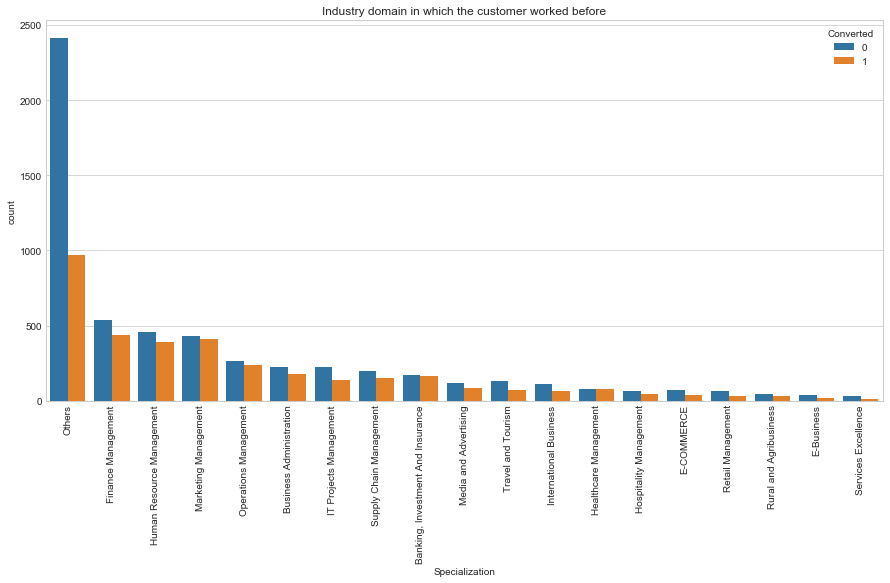

In [18]:
#Filling nan values with others (as there might be some other specialization) and then Plotting countplot on Specialization column taking hue as Converted
df['Specialization'] = df['Specialization'].replace(np.nan, 'Others')
plt.figure(figsize=(15,7))
sns.set_style("whitegrid")
ax=sns.countplot("Specialization", hue="Converted",data=df,order = df['Specialization'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title("Industry domain in which the customer worked before")
plt.show()

#### Observation and Inferences:
-Banking, Investment and Insurance, HealthCare management, Marketing management are few industry domain specialization from where most leads are converted. Not much conversion rate observed.

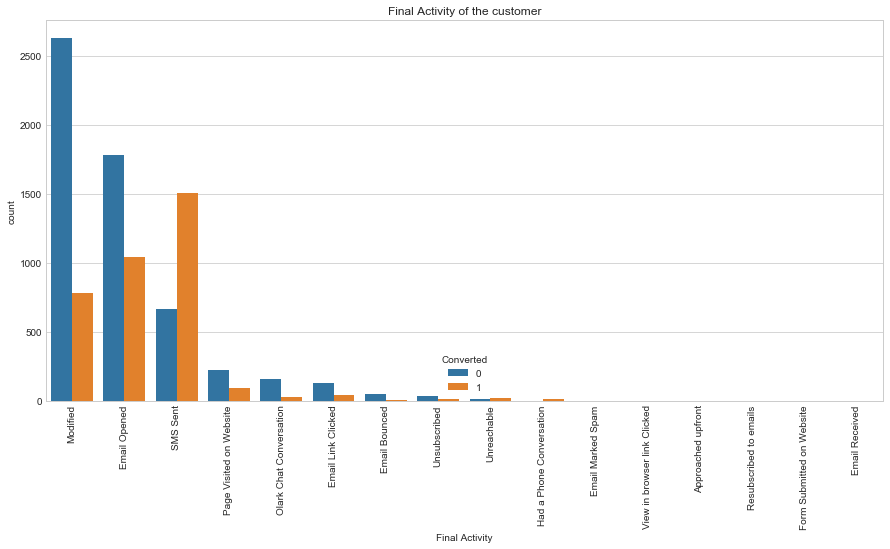

In [19]:
# Code to merge two same column and making it one column (Last Activity + Last Notable Activity = Final Activity)
k=[]
for i,j in zip(df["Last Activity"],df["Last Notable Activity"]):
    if i==np.NaN and j!=np.NaN:
        k.append(j)
    elif i!=np.NaN and j==np.NaN:
        k.append(i)
    elif i==np.NaN and j==np.NaN:
        pass
    else:
        k.append(j)

df["Final Activity"]=k

plt.figure(figsize=(15,7))
sns.set_style("whitegrid")
ax=sns.countplot("Final Activity", data=df, hue="Converted",order = df["Final Activity"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title("Final Activity of the customer")
plt.show()
df=df.drop(["Last Activity","Last Notable Activity"],axis=1)

#### Observation and Inferences:
-We see from the above graph that conversion rate is much higher for Final activity when sending the SMS followed by Email Opened.Can be used for drawing inference.

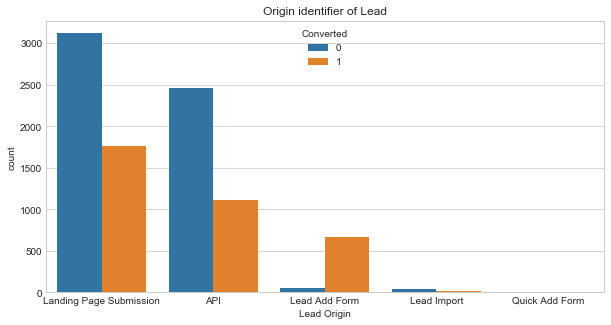

In [20]:
#Plotting countplot on Origin identifier of lead taking hue as Converted
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
ax=sns.countplot("Lead Origin", hue="Converted",data=df,order = df['Lead Origin'].value_counts().index)
plt.title("Origin identifier of Lead")
plt.show()

#### Observation and Inferences:
-Lead Add Form as origin identifier has much higher conversion rate, can be used for drawing inference.

In [21]:
#Describing and checking null values of Specialization column.
print(df['Tags'].describe())
print("Total Null values in Specialization column: ",df["Tags"].isnull().sum())

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object
Total Null values in Specialization column:  3353


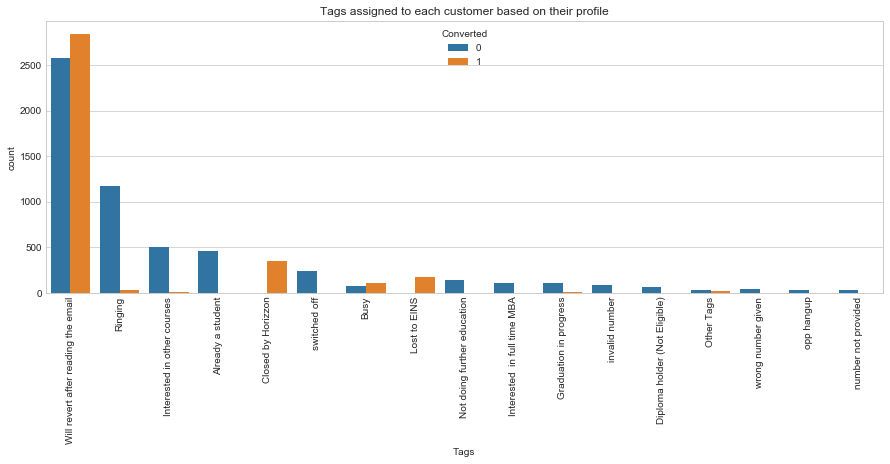

In [22]:
#Filling NaN values with 'Will revert after reading the email' as most of the data containing this value.
#Cannot drop null values as 3353 i.e. 36.5% values are missing, if dropped then it will be a big loss to our data on which
#we are analyzing. Replacing 'in touch with EINS','Lost to Others','Still Thinking','Want to take admission but has financial
#problems','In confusion whether part time or DLP','Interested in Next batch','Lateral student','Shall take in the next 
#coming month','University not recognized','Recognition issue (DEC approval)' values with 'Others' as these values are 
# very less in numbers so can be combined. Then Plotting countplot on Tags taking hue as Converted.
df['Tags'] = df['Tags'].replace(np.nan, 'Will revert after reading the email')
df['Tags'] = df['Tags'].replace(['in touch with EINS','Lost to Others','Still Thinking','Want to take admission but has financial problems','In confusion whether part time or DLP','Interested in Next batch','Lateral student','Shall take in the next coming month','University not recognized','Recognition issue (DEC approval)'],'Other Tags')
plt.figure(figsize=(15,5))
sns.set_style("whitegrid")
ax=sns.countplot("Tags", hue="Converted",data=df,order = df['Tags'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title("Tags assigned to each customer based on their profile")
plt.show()

#### Observation and Inferences:
-Will revert after reading the email, Lost to EINS and Closed by Horizzon have a very high lead conversion rate. 
-Ringing, Interested in other courses, Graduation in progress and Other Tags are the tags that have very less positive conversion rate.
-Switch off, Not doing further education, invalid number, wrong number given, Interested in full time MBA  are the major few that had nearly no conversion rate. Can be used for drawing inference.

['Low in Relevance' nan 'Might be' 'Not Sure' 'Worst' 'High in Relevance']


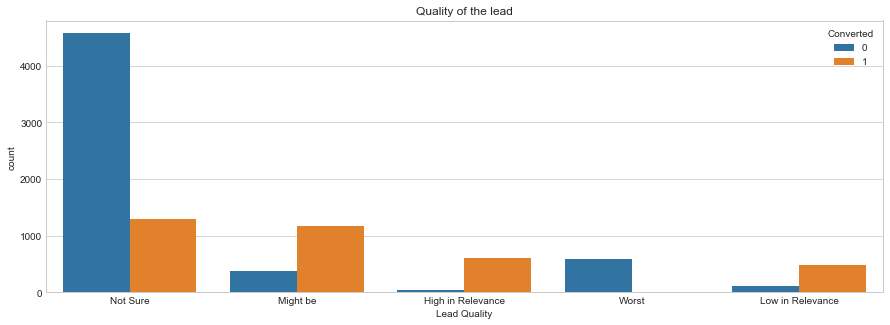

In [23]:
# Printing unique values in Lead Quality and then replacing null values with Not Sure value.
# Plotting countplot for the same
print(df['Lead Quality'].unique())
df['Lead Quality'] = df['Lead Quality'].replace(np.NaN, 'Not Sure')
plt.figure(figsize=(15,5))
sns.set_style("whitegrid")
ax=sns.countplot("Lead Quality", hue="Converted",data=df,order = df['Lead Quality'].value_counts().index)
plt.title("Quality of the lead")
plt.show()

#### Observation and Inference
-Worst and Not Sure lead quality are from the ones having low conversion rate while High in Relevance, Might be and Low in Relevance having good conversion rate.

In [24]:
# Finding unique values in current occupation column and then filling nan values with Unemoployed as it covers most of the values in this column.
print(df["What is your current occupation"].unique())
print(df["What is your current occupation"].describe())
df['What is your current occupation'] = df['What is your current occupation'].replace(np.NaN, 'Unemployed')

['Unemployed' 'Student' nan 'Working Professional' 'Businessman' 'Other'
 'Housewife']
count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object


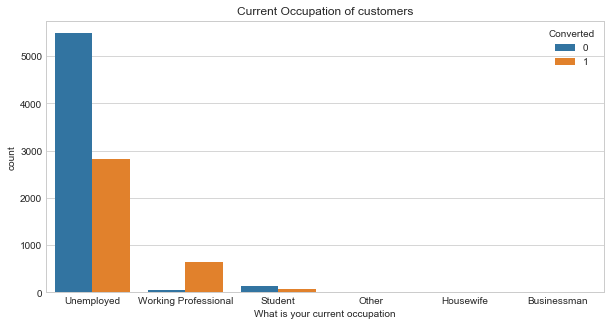

In [25]:
#Plotting countplot on Current Occupation of customers taking hue as Converted
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
ax=sns.countplot("What is your current occupation", hue="Converted",data=df,order = df['What is your current occupation'].value_counts().index)
plt.title("Current Occupation of customers")
plt.show()

#### Observation and Inference:
-Working Professional are the ones which having more chances of converting into hot lead. Can be considered for drawing inference.

In [26]:
#Describing "What matters most to you in choosing a course" column
df["What matters most to you in choosing a course"].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

#### Observation and Inference:
-No inference can be drawn from this column as only one value covers most of the data in this column 

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object
count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object
[nan 'Mumbai' 'Thane & Outskirts' 'Other Metro Cities' 'Other Cities'
 'Other Cities of Maharashtra' 'Tier II Cities']


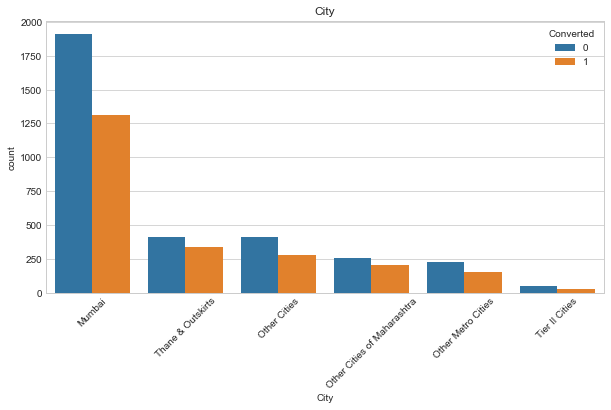

In [27]:
#Describing Country and City column
print(df["Country"].describe())
print(df["City"].describe())
print(df["City"].unique())
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
ax=sns.countplot("City", hue="Converted",data=df,order = df['City'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.title("City")
plt.show()

#### Observation and Inferences:
-No Inference can be drawn from Country column as most of the value is India. 
-Also when we do count-plot for city, it  does not provide any insight which will help in lead conversion prediction, hence not using it as an inference drawing column.

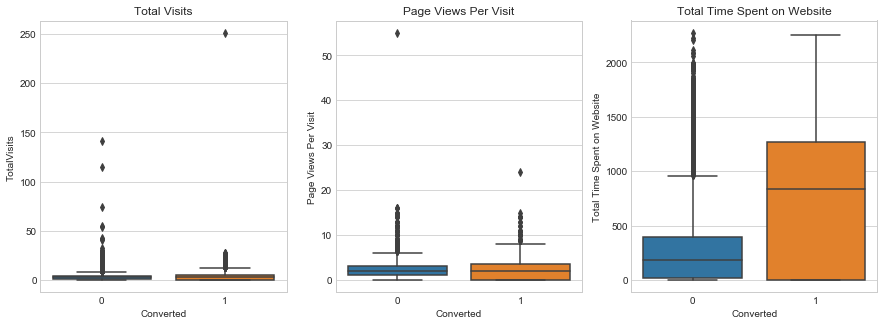

In [28]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)
plt.title("Total Visits")
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df)
plt.title("Page Views Per Visit")
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df)
plt.title("Total Time Spent on Website")
plt.show()

#### Observation and Inferences:
-'Total Visits' and 'Page Views per visit' having same median value for both converted and not converted leads, hence for now, no inference can be drawn from both these columns. 
-While Converted leads are shown to have spending much more time on websites than ones who are not converting. So 'Total Time Spent on Website' column can be used for drawing inference. 

In [29]:
print(df["Do Not Call"].describe(),end="\n\n")
print(df["Search"].describe(),end="\n\n")
print(df["Newspaper Article"].describe(),end="\n\n")
print(df["X Education Forums"].describe(),end="\n\n")
print(df["Newspaper"].describe(),end="\n\n")
print(df["Digital Advertisement"].describe(),end="\n\n")
print(df["Through Recommendations"].describe(),end="\n\n")
print(df["A free copy of Mastering The Interview"].describe(),end="\n\n")

count     9240
unique       2
top         No
freq      9238
Name: Do Not Call, dtype: object

count     9240
unique       2
top         No
freq      9226
Name: Search, dtype: object

count     9240
unique       2
top         No
freq      9238
Name: Newspaper Article, dtype: object

count     9240
unique       2
top         No
freq      9239
Name: X Education Forums, dtype: object

count     9240
unique       2
top         No
freq      9239
Name: Newspaper, dtype: object

count     9240
unique       2
top         No
freq      9236
Name: Digital Advertisement, dtype: object

count     9240
unique       2
top         No
freq      9233
Name: Through Recommendations, dtype: object

count     9240
unique       2
top         No
freq      6352
Name: A free copy of Mastering The Interview, dtype: object



#### Observation and Inferences:
-All columns except 'A free copy of Mastering The Interview' contains 'No' as a value for around 99% datapoints.
-We would ignore those values as no inference can be drawn with them.

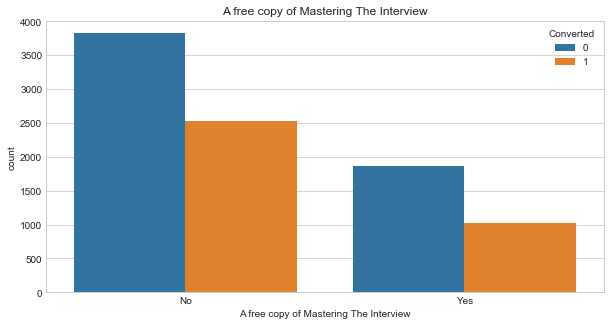

In [30]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
ax=sns.countplot("A free copy of Mastering The Interview", hue="Converted",data=df,order = df['A free copy of Mastering The Interview'].value_counts().index)
plt.title("A free copy of Mastering The Interview")
plt.show()

#### Observation and Inferences:
-No inference can be drawn for now from above countplot as both the conversion seems to show both positive and negative conversion in equal propotion.

In [31]:
# As there are many columns which are of no use hence Dropping those columns and making a new dataframe as df_for_anlys.
# Columns dropped are "Country","City","What matters most to you in choosing a course","Do Not Call","Search",
#"Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations".
df_for_anlys=df.drop(["Country","City","What matters most to you in choosing a course","Do Not Call","Search","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations"],axis=1)
print(df_for_anlys.head())

   Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

            Specialization What is your current occupation  \
0                   Othe

In [32]:
df_for_anlys["Do Not Email"]=df_for_anlys["Do Not Email"].replace({'Yes': 1, 'No': 0})

In [33]:
#Again checking for missing values in each column.
(df_for_anlys.isnull().sum()/df_for_anlys.shape[0])*100

Lead Number                               0.000000
Lead Origin                               0.000000
Lead Source                               0.389610
Do Not Email                              0.000000
Converted                                 0.000000
TotalVisits                               1.482684
Total Time Spent on Website               0.000000
Page Views Per Visit                      1.482684
Specialization                            0.000000
What is your current occupation           0.000000
Tags                                      0.000000
Lead Quality                              0.000000
A free copy of Mastering The Interview    0.000000
Final Activity                            0.000000
dtype: float64

In [34]:
#As missing values are less than 1.5% hence dropping the remaining nan values.
df_for_anlys.dropna(inplace = True)

In [35]:
# Loss of 9240-9074=166 rows in new dataframe
df_for_anlys.shape

(9074, 14)

In [36]:
print(df_for_anlys.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
Lead Number                               9074 non-null int64
Lead Origin                               9074 non-null object
Lead Source                               9074 non-null object
Do Not Email                              9074 non-null int64
Converted                                 9074 non-null int64
TotalVisits                               9074 non-null float64
Total Time Spent on Website               9074 non-null int64
Page Views Per Visit                      9074 non-null float64
Specialization                            9074 non-null object
What is your current occupation           9074 non-null object
Tags                                      9074 non-null object
Lead Quality                              9074 non-null object
A free copy of Mastering The Interview    9074 non-null object
Final Activity                            9074 non-null object
dtypes: float

### Bivariate Analysis for Numerical Columns

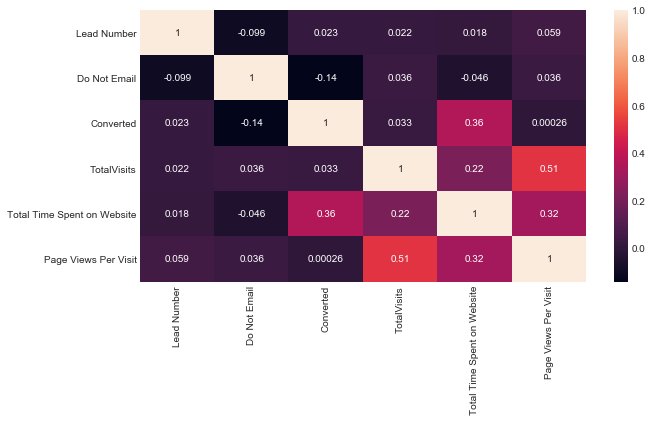

In [37]:
#Bivariate analysis for numerical variables
plt.figure(figsize=(10,5))
sns.heatmap(data=df_for_anlys.corr(),annot=True)
plt.show()

#### Observation and Inference:
-Not much strong correlation is observed between columns.
-Although some correlation exists between Page Views Per Visit and Total Visits is seen, which sees to make sense when thinking logically.

In [38]:
#Creating dummy variables for the categorical variables.
temp = pd.get_dummies(df_for_anlys[['Lead Origin','Lead Source','Specialization','What is your current occupation','Tags','Lead Quality','A free copy of Mastering The Interview','Final Activity']],drop_first=True)
df_for_anlys=pd.concat([df_for_anlys,temp], axis=1)
df_for_anlys.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Tags,Lead Quality,A free copy of Mastering The Interview,Final Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,A free copy of Mastering The Interview_Yes,Final Activity_Email Bounced,Final Activity_Email Link Clicked,Final Activity_Email Marked Spam,Final Activity_Email Opened,Final Activity_Email Received,Final Activity_Form Submitted on Website,Final Activity_Had a Phone Conversation,Final Activity_Modified,Final Activity_Olark Chat Conversation,Final Activity_Page Visited on Website,Final Activity_Resubscribed to emails,Final Activity_SMS Sent,Final Activity_Unreachable,Final Activity_Unsubscribed,Final Activity_View in browser link Clicked
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Others,Unemployed,Interested in other courses,Low in Relevance,No,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,API,Organic Search,0,0,5.0,674,2.5,Others,Unemployed,Ringing,Not Sure,No,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Business Administration,Student,Will revert after reading the email,Might be,Yes,Email Opened,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Media and Advertising,Unemployed,Ringing,Not Sure,No,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Others,Unemployed,Will revert after reading the email,Might be,No,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [39]:
#Dropping all categorical variables for which dummies has been created.
df_for_anlys = df_for_anlys.drop(['Lead Origin', 'Lead Source', 'Specialization','What is your current occupation','Tags','Lead Quality','A free copy of Mastering The Interview','Final Activity'], axis = 1)
df_for_anlys.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,A free copy of Mastering The Interview_Yes,Final Activity_Email Bounced,Final Activity_Email Link Clicked,Final Activity_Email Marked Spam,Final Activity_Email Opened,Final Activity_Email Received,Final Activity_Form Submitted on Website,Final Activity_Had a Phone Conversation,Final Activity_Modified,Final Activity_Olark Chat Conversation,Final Activity_Page Visited on Website,Final Activity_Resubscribed to emails,Final Activity_SMS Sent,Final Activity_Unreachable,Final Activity_Unsubscribed,Final Activity_View in browser link Clicked
0,660737,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,0,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = df_for_anlys.drop(['Converted','Lead Number'], axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,A free copy of Mastering The Interview_Yes,Final Activity_Email Bounced,Final Activity_Email Link Clicked,Final Activity_Email Marked Spam,Final Activity_Email Opened,Final Activity_Email Received,Final Activity_Form Submitted on Website,Final Activity_Had a Phone Conversation,Final Activity_Modified,Final Activity_Olark Chat Conversation,Final Activity_Page Visited on Website,Final Activity_Resubscribed to emails,Final Activity_SMS Sent,Final Activity_Unreachable,Final Activity_Unsubscribed,Final Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [42]:
y = df_for_anlys['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,A free copy of Mastering The Interview_Yes,Final Activity_Email Bounced,Final Activity_Email Link Clicked,Final Activity_Email Marked Spam,Final Activity_Email Opened,Final Activity_Email Received,Final Activity_Form Submitted on Website,Final Activity_Had a Phone Conversation,Final Activity_Modified,Final Activity_Olark Chat Conversation,Final Activity_Page Visited on Website,Final Activity_Resubscribed to emails,Final Activity_SMS Sent,Final Activity_Unreachable,Final Activity_Unsubscribed,Final Activity_View in browser link Clicked
3009,0,-0.284595,-0.160255,-0.179666,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,-0.284595,-0.540048,-0.179666,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,-0.671384,-0.888650,-1.132538,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,-0.284595,1.643304,-0.179666,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0.295588,2.017593,0.058552,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [46]:
converted = (sum(df_for_anlys['Converted'])/len(df_for_anlys['Converted'].index))*100
converted

37.855411064580117

In [47]:
import statsmodels.api as sm

In [48]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6276
Model Family:                Binomial   Df Model:                           74
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -1265.8
Date:                Sun, 25 Aug 2019   Deviance:                       2531.6
Time:                        19:53:08   Pearson chi2:                 3.04e+04
No. Iterations:                    24                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   23.8758   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Do Not Email                                            -1.4113      0.301     -4.694      0.000      -2.001      -0.822
TotalVisits                                              0.1619      0.036      4.446      0.000       0.091       0.233
Total Time Spent on Website                              1.1657      0.064     18.159      0.000       1.040       1.291
Page Views Per Visit                                    -0.1560      0.073     -2.137      0.033      -0.299      -0.013
Lead Origin_Landing Page Submission                     -0.9951      0.219     -4.549      0.000      -1.424      -0.566
Lead Origin_Lead Add Form                               -0.3678      1.263     -0.291      0.771      -2.844       2.108
Lead Origin_Lead Import                                 30.1028   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Facebook                                   -28.8708   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Google                                       0.0846      0.183      0.463      0.643      -0.274       0.443
Lead Source_Olark Chat                                   0.7839      0.232      3.382      0.001       0.330       1.238
Lead Source_Organic Search                               0.1247      0.211      0.591      0.555      -0.289       0.539
Lead Source_Other Sources                                0.6002      0.853      0.704      0.481      -1.071       2.271
Lead Source_Reference                                    1.8864      1.323      1.426      0.154      -0.707       4.479
Lead Source_Referral Sites                              -0.2548      0.492     -0.517      0.605      -1.220       0.710
Lead Source_Welingak Website                             5.7918      1.477      3.920      0.000       2.896       8.687
Specialization_Business Administration                  -0.1284      0.396     -0.324      0.746      -0.904       0.647
Specialization_E-Business                               -0.3838      0.719     -0.534      0.594      -1.793       1.026
Specialization_E-COMMERCE                                0.7855      0.572      1.373      0.170      -0.336       1.907
Specialization_Finance Management                       -0.4153      0.350     -1.185      0.236      -1.102       0.272
Specialization_Healthcare Management                    -0.4175      0.521     -0.801      0.423      -1.438       0.604
Specialization_Hospitality Management                   -0.0206      0.558     -0.037      0.971      -1.115       1.073
Specialization_Human Resource Management                -0.2801      0.351     -0.798      0.425      -0.968       0.407
Specialization_I

In [49]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [50]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [51]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 37),
 ('Total Time Spent on Website', False, 4),
 ('Page Views Per Visit', False, 39),
 ('Lead Origin_Landing Page Submission', False, 17),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 3),
 ('Lead Source_Facebook', False, 38),
 ('Lead Source_Google', False, 45),
 ('Lead Source_Olark Chat', False, 6),
 ('Lead Source_Organic Search', False, 44),
 ('Lead Source_Other Sources', False, 56),
 ('Lead Source_Reference', False, 48),
 ('Lead Source_Referral Sites', False, 27),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Business Administration', False, 58),
 ('Specialization_E-Business', False, 43),
 ('Specialization_E-COMMERCE', False, 16),
 ('Specialization_Finance Management', False, 33),
 ('Specialization_Healthcare Management', False, 32),
 ('Specialization_Hospitality Management', False, 54),
 ('Specialization_Human Resource Management', False, 40),
 ('Specialization_IT Projects Management

In [52]:
col = X_train.columns[rfe.support_]
print(col)

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Final Activity_SMS Sent'],
      dtype='object')


In [53]:
#Model 1 
X_train_sm = sm.add_constant(X_train[col])
logreg = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logreg.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -1579.7
Date:                Sun, 25 Aug 2019   Deviance:                       3159.4
Time:                        19:53:13   Pearson chi2:                 3.13e+04
No. Iterations:                    23                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8388      0.213     -8.638      0.000      -2.256      -1.422
Do Not Email                                            -1.2901      0.214     -6.040      0.000      -1.709      -0.871
Lead Origin_Lead Add Form                                1.0391      0.361      2.882      0.004       0.332       1.746
Lead Source_Welingak Website                             3.4683      0.817      4.244      0.000       1.867       5.070
What is your current occupation_Working Professional     1.2770      0.287      4.452      0.000       0.715       1.839
Tags_Busy                                                3.5326      0.331     10.674      0.000       2.884       4.181
Tags_Closed by Horizzon                                  7.7308      0.762     10.152      0.000       6.238       9.223
Tags_Lost to EINS                                        8.9495      0.753     11.889      0.000       7.474      10.425
Tags_Ringing                                            -1.9939      0.339     -5.883      0.000      -2.658      -1.330
Tags_Will revert after reading the email                 3.7217      0.226     16.449      0.000       3.278       4.165
Tags_invalid number                                    -22.4878   1.34e+04     -0.002      0.999   -2.63e+04    2.63e+04
Tags_number not provided                               -22.9675   2.33e+04     -0.001      0.999   -4.57e+04    4.57e+04
Tags_switched off                                       -2.5983      0.588     -4.415      0.000      -3.752      -1.445
Lead Quality_Not Sure                                   -3.3581      0.129    -26.079      0.000      -3.610      -3.106
Lead Quality_Worst                                      -3.8185      0.843     -4.530      0.000      -5.471      -2.166
Final Activity_SMS Sent                                  2.8042      0.123     22.864      0.000       2.564       3.045
========================================================================================================================
"""

In [54]:
#Dropping Tags_number not provided as the P-value is greater than 0.05
col=col.drop('Tags_number not provided',1)

In [55]:
#Model 2
X_train_sm = sm.add_constant(X_train[col])
logreg = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logreg.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -1583.1
Date:                Sun, 25 Aug 2019   Deviance:                       3166.1
Time:                        19:53:14   Pearson chi2:                 3.11e+04
No. Iterations:                    23                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9321      0.214     -9.014      0.000      -2.352      -1.512
Do Not Email                                            -1.3098      0.213     -6.159      0.000      -1.727      -0.893
Lead Origin_Lead Add Form                                1.0588      0.361      2.930      0.003       0.351       1.767
Lead Source_Welingak Website                             3.4494      0.818      4.218      0.000       1.847       5.052
What is your current occupation_Working Professional     1.3025      0.288      4.517      0.000       0.737       1.868
Tags_Busy                                                3.6319      0.331     10.977      0.000       2.983       4.280
Tags_Closed by Horizzon                                  7.8114      0.762     10.251      0.000       6.318       9.305
Tags_Lost to EINS                                        9.0287      0.753     11.989      0.000       7.553      10.505
Tags_Ringing                                            -1.8820      0.338     -5.565      0.000      -2.545      -1.219
Tags_Will revert after reading the email                 3.8115      0.228     16.737      0.000       3.365       4.258
Tags_invalid number                                    -22.3753   1.34e+04     -0.002      0.999   -2.63e+04    2.63e+04
Tags_switched off                                       -2.4815      0.588     -4.221      0.000      -3.634      -1.329
Lead Quality_Not Sure                                   -3.3487      0.129    -26.040      0.000      -3.601      -3.097
Lead Quality_Worst                                      -3.7506      0.850     -4.412      0.000      -5.417      -2.085
Final Activity_SMS Sent                                  2.7801      0.122     22.856      0.000       2.542       3.019
========================================================================================================================
"""

In [56]:
#Dropping Tags_invalid number as the P-value is greater than 0.05
col=col.drop('Tags_invalid number',1)

In [57]:
#model 3
X_train_sm = sm.add_constant(X_train[col])
logreg = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logreg.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -1588.8
Date:                Sun, 25 Aug 2019   Deviance:                       3177.6
Time:                        19:53:14   Pearson chi2:                 3.08e+04
No. Iterations:                     8                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0888      0.216     -9.654      0.000      -2.513      -1.665
Do Not Email                                            -1.3012      0.212     -6.134      0.000      -1.717      -0.885
Lead Origin_Lead Add Form                                1.0894      0.363      3.001      0.003       0.378       1.801
Lead Source_Welingak Website                             3.4138      0.818      4.173      0.000       1.810       5.017
What is your current occupation_Working Professional     1.3403      0.291      4.602      0.000       0.769       1.911
Tags_Busy                                                3.8040      0.330     11.532      0.000       3.157       4.450
Tags_Closed by Horizzon                                  7.9562      0.763     10.433      0.000       6.461       9.451
Tags_Lost to EINS                                        9.1785      0.754     12.177      0.000       7.701      10.656
Tags_Ringing                                            -1.6947      0.337     -5.036      0.000      -2.354      -1.035
Tags_Will revert after reading the email                 3.9665      0.229     17.311      0.000       3.517       4.416
Tags_switched off                                       -2.2882      0.587     -3.900      0.000      -3.438      -1.138
Lead Quality_Not Sure                                   -3.3406      0.128    -26.026      0.000      -3.592      -3.089
Lead Quality_Worst                                      -3.7624      0.850     -4.426      0.000      -5.428      -2.096
Final Activity_SMS Sent                                  2.7406      0.120     22.847      0.000       2.506       2.976
========================================================================================================================
"""

In [58]:
#Calculating the Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Tags_Will revert after reading the email,2.81
10,Lead Quality_Not Sure,2.76
1,Lead Origin_Lead Add Form,1.62
7,Tags_Ringing,1.54
12,Final Activity_SMS Sent,1.52
2,Lead Source_Welingak Website,1.36
3,What is your current occupation_Working Profes...,1.26
5,Tags_Closed by Horizzon,1.15
4,Tags_Busy,1.11
0,Do Not Email,1.10


In [59]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.188037
1012    0.194070
9226    0.000805
4750    0.782077
7987    0.977003
1281    0.990228
2880    0.188037
4971    0.753104
7536    0.867357
1248    0.000805
dtype: float64

In [60]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([  1.88037158e-01,   1.94070077e-01,   8.04879357e-04,
         7.82076694e-01,   9.77003470e-01,   9.90227993e-01,
         1.88037158e-01,   7.53103755e-01,   8.67356930e-01,
         8.04879357e-04])

In [61]:
#Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.188037,3009
1,0,0.194070,1012
2,0,0.000805,9226
3,1,0.782077,4750
4,1,0.977003,7987


In [62]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final["Converted_prob"].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.188037,3009,0
1,0,0.194070,1012,0
2,0,0.000805,9226,0
3,1,0.782077,4750,1
4,1,0.977003,7987,1


In [63]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3756  149]
 [ 363 2083]]


In [64]:
# Predicted       Not_Converted  Converted
# Actual
# Not_Converted        3756      149
# Converted            363       2083

In [65]:
#Checking overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.919382774366


In [66]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [67]:
# Sensitivity of our logistic regression model
TP / float(TP+FN)

0.85159443990188066

In [68]:
# Specificity of our logistic regression model
TN / float(TN+FP)

0.96184379001280407

In [69]:
#False postive rate i.e. predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.0381562099872


In [70]:
# Positive predictive value i.e. predicting converted when customer actually got converted
print (TP / float(TP+FP))

0.933243727599


In [71]:
# Negative predictive value i.e. predicting not converted when customer actually not converted
print (TN / float(TN+ FN))

0.911871813547


In [72]:
# Drawing ROC Curve, below is the ROC curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [73]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

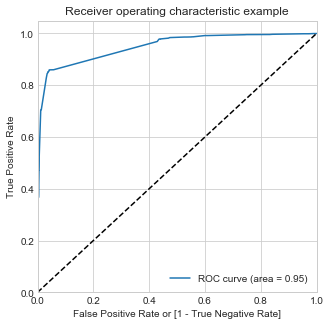

In [74]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### Observation and Inferences:
-Since curve is closer to the left-hand border and the top border of the ROC space, which is the ideal thing, we can say the model is much accurate.

In [75]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.188037,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.194070,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.000805,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.782077,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.977003,7987,1,1,1,1,1,1,1,1,1,1,1


In [76]:
# Calculating accuracy, sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.385136     1.000000     0.000000
0.1          0.1  0.705873     0.981603     0.533163
0.2          0.2  0.910408     0.859771     0.942125
0.3          0.3  0.918910     0.859362     0.956210
0.4          0.4  0.920013     0.858136     0.958771
0.5          0.5  0.919383     0.851594     0.961844
0.6          0.6  0.920170     0.851594     0.963124
0.7          0.7  0.919225     0.845053     0.965685
0.8          0.8  0.878287     0.705233     0.986684
0.9          0.9  0.813258     0.524530     0.994110


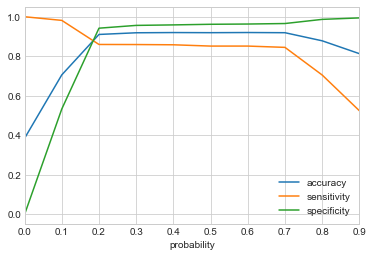

In [77]:
# Plotting accuracy, sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [78]:
# From the curve above, 0.2 is the optimum point to take it as a cutoff probability.
y_train_pred_final['final_predicted'] = y_train_pred_final["Converted_prob"].map( lambda x: 1 if x > 0.2 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.188037,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.194070,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.000805,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.782077,4750,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.977003,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [79]:
# Checking the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.91040780979373326

In [109]:
# Assigning Lead Score to each row
y_train_pred_final['Lead_Score'] = y_train_pred_final["Converted_prob"].map( lambda x: round(x*100))
y_train_pred_final

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.188037,3009,0,1,1,0,0,0,0,0,0,0,0,0,19
1,0,0.194070,1012,0,1,1,0,0,0,0,0,0,0,0,0,19
2,0,0.000805,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.782077,4750,1,1,1,1,1,1,1,1,1,0,0,1,78
4,1,0.977003,7987,1,1,1,1,1,1,1,1,1,1,1,1,98
5,1,0.990228,1281,1,1,1,1,1,1,1,1,1,1,1,1,99
6,0,0.188037,2880,0,1,1,0,0,0,0,0,0,0,0,0,19
7,1,0.753104,4971,1,1,1,1,1,1,1,1,1,0,0,1,75
8,1,0.867357,7536,1,1,1,1,1,1,1,1,1,1,0,1,87
9,0,0.000805,1248,0,1,0,0,0,0,0,0,0,0,0,0,0


In [81]:
#Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3679,  226],
       [ 343, 2103]], dtype=int64)

In [82]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [83]:
print("Sensitivity = ",TP / float(TP+FN))
print("Specificity =", TN / float(TN+FP))
print("False positive rate =",FP/ float(TN+FP))
print("Positive predictive value =",TP / float(TP+FP))
print("Negative predictive value =",TN / float(TN+ FN))

Sensitivity =  0.859771054783
Specificity = 0.942125480154
False positive rate = 0.0578745198464
Positive predictive value = 0.902962644912
Negative predictive value = 0.914719045251


#### Precision and Recall

In [84]:
# Looking at Confusion matrix
confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion3

array([[3756,  149],
       [ 363, 2083]], dtype=int64)

In [85]:
from sklearn.metrics import precision_score, recall_score

In [86]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.93324372759856633

In [87]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.85159443990188066

In [88]:
from sklearn.metrics import precision_recall_curve

In [89]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

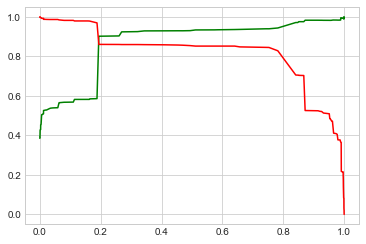

In [90]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [91]:
#Scaling on test set
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [92]:
# Selecting column in test set which are significant enough to analyse
X_test = X_test[col]
X_test.head()

,Do Not Email,Lead Origin_Lead Add Form,Lead Source_Welingak Website,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Final Activity_SMS Sent
3271,0,0,0,0,0,0,0,0,1,0,1,0,0
1490,0,0,0,1,0,0,0,0,1,0,0,0,0
7936,0,0,0,0,0,0,0,0,1,0,1,0,0
4216,0,1,0,0,0,1,0,0,0,0,0,0,0
3830,0,0,0,0,0,0,0,0,1,0,1,0,0


In [93]:
#Adding constant on test set
X_test_sm = sm.add_constant(X_test)

In [94]:
# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)

In [95]:
y_test_pred[:10]

3271    0.188037
1490    0.961508
7936    0.188037
4216    0.999049
3830    0.188037
1800    0.961508
6507    0.012329
4821    0.000445
4223    0.996691
4714    0.188037
dtype: float64

In [96]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3271,0.188037
1490,0.961508
7936,0.188037
4216,0.999049
3830,0.188037


In [97]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [98]:
# Putting CustID to index
y_test_df['Cust_ID'] = y_test_df.index

In [99]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [100]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Cust_ID,0
0,0,3271,0.188037
1,1,1490,0.961508
2,0,7936,0.188037
3,1,4216,0.999049
4,0,3830,0.188037


In [101]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [102]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Cust_ID','Converted','Converted_Prob'], axis=1)
y_pred_final.head()

,Cust_ID,Converted,Converted_Prob
0,3271,0,0.188037
1,1490,1,0.961508
2,7936,0,0.188037
3,4216,1,0.999049
4,3830,0,0.188037


In [103]:
y_pred_final['final_predicted'] = y_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.195 else 0)
y_pred_final.head()

,Cust_ID,Converted,Converted_Prob,final_predicted
0,3271,0,0.188037,0
1,1490,1,0.961508,1
2,7936,0,0.188037,0
3,4216,1,0.999049,1
4,3830,0,0.188037,0


In [104]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.90672052882849796

In [105]:
#Confusion matrix
confusion4 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion4

array([[1635,   99],
       [ 155,  834]], dtype=int64)

In [106]:
TP = confusion4[1,1] # true positive 
TN = confusion4[0,0] # true negatives
FP = confusion4[0,1] # false positives
FN = confusion4[1,0] # false negatives

In [107]:
# Sensitivity of our logistic regression model
TP / float(TP+FN)

0.84327603640040449

In [108]:
# Specificity  of our logistic regression model
TN / float(TN+FP)

0.94290657439446368